In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/User/Documents/Flatiron/Phase2/kc_house_data.csv')


    id - unique identified for a house
    dateDate - house was sold
    pricePrice - is prediction target
    bedroomsNumber - of Bedrooms/House
    bathroomsNumber - of bathrooms/bedrooms
    sqft_livingsquare - footage of the home
    sqft_lotsquare - footage of the lot
    floorsTotal - floors (levels) in house
    waterfront - House which has a view to a waterfront
    view - Has been viewed
    condition - How good the condition is ( Overall )
    grade - overall grade given to the housing unit, based on King County grading system
    sqft_above - square footage of house apart from basement
    sqft_basement - square footage of the basement
    yr_built - Built Year
    yr_renovated - Year when house was renovated
    zipcode - zip
    lat - Latitude coordinate
    long - Longitude coordinate
    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 1. Data Cleaning
1. Some datatypes are inconcistent with expected type: ```yr_renovated, waterfront, floors```.
2. Missing values in ```waterfront, view, yr_renovated```.
3. Some datatypes are objects: ```sqft_basement, date```.

In [4]:
for col in df.columns:
    print('==================================================')
    print('Examining:', df[col])
    print(df[col].value_counts(normalize = True))

Examining: 0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21592     263000018
21593    6600060120
21594    1523300141
21595     291310100
21596    1523300157
Name: id, Length: 21597, dtype: int64
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
                ...   
7812801125    0.000046
4364700875    0.000046
3021059276    0.000046
880000205     0.000046
1777500160    0.000046
Name: id, Length: 21420, dtype: float64
Examining: 0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object
6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
               ...   
5/15/2015    0.000046
8/30/2014   

# Interesting Findings
- ```ID```: There are multiple entires with the same ```id```. This may indicate that the house was bought and sold multiple times, if this is the case then the entries must be double checked according to their ```lat``` and ```long```  to ensure the ID's are identicle to confirm that it is the same house. If they are not identicle, then this is a clerical error and the data should not be included in the analysis.
- ```Bedrooms```: There is 1 outlier in the ```bedrooms``` column dataset which cited 33 bedrooms. This is peculiar given the next highest value was 11 bedrooms. This may be a clerical issue where the data was entered incorrectly.
- ```Bathrooms```: There are multiple datavalues in the ```bathrooms``` column with a float value of 'X.75'. The '.75' categorization of bathrooms is atypical as it is mostly categorized into either an integer value or a float value ending in '.5'.
- ```Square Foot Lot```: There are some outliers in the ```sqft_lot``` column dataset which cited over 300,000 sq ft which is an extremely large amount of land. This is peculiar as it is a significant portion of land given the area examined which is a major city in the US.
- ```Floors```: There are multiple datavalues in the ```floors``` column with a float value of 'X.5'. Typically floors are given in integer values, but there may be some exception made here that I am not aware of. The datavalues in these cases will have to be examined more closely.
- ```Square Foot Basement```: There are missing values in the ```sqft_basement``` column which is represented by '?'. This datavalue should be inspected to see the validity of the entries.
- ```Year Built```: This data is too specific, it would be better to group this information based on the decade the house was built.
- ```Year Renovated```: The representation of the information in the ```yr_renovated``` column needs to be cleaned due to inconsistencies with DataType and data representation. The DataType should be converted to an integer and the '0.0' and 'NaN' values should be consistent to represent no renovations were made. A simple binary, yes or no, on renovation is all that is required for my analysis. As such, the information in this column should be changed to indicate a value of 0 = Not Renovated and 1 = Yes Renovated.
- Convert data types: The ```date``` and ```sqft_basement``` column data types are 'object' types. This makes working with these columns difficult, so they need to be adjusted accordingly.

## Explore: Date Cleaning

### ID

In [5]:
# I want to compare the number of unique ID's to the total number of data entries, 21,597, in order to 
# understand how frequently this occurs.
df.id.nunique()

21420

In [6]:
# Because the number of unique ID's and recorded ID's differ, I want to understand the shared ID entries more.
df[df.duplicated(subset=['id'], keep = False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0,2013,0.0,98065,47.5184,-121.886,2850,6000


It appears that in most cases, the ID's of the entries are the same house that was sold multiple times.
In this case, consideration should be made to either include all sales of these houses, or just the most recent sale. For this analysis, I have decided to only keep the most recent sale of each ```id``` house for its most recent, up to date information.

In [7]:
df[df.duplicated(subset=['id'], keep = 'last')]
####how do I keep only the last in my original df? 
# inplace drop

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280,1922,1984.0,98146,47.4957,-122.352,1820,7460
345,3969300030,7/23/2014,165000,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0,1943,0.0,98178,47.4897,-122.240,1020,7138
371,2231500030,10/1/2014,315000,4,2.25,2180,10754,1.0,NaN,0.0,...,7,1100,1080,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20164,7853400250,6/4/2014,610000,4,3.50,2910,5260,2.0,0.0,0.0,...,9,2910,0,2012,0.0,98065,47.5168,-121.883,2910,5260
20596,2724049222,8/2/2014,163800,2,2.50,1000,1092,2.0,NaN,0.0,...,7,990,10,2004,0.0,98118,47.5419,-122.271,1330,1466
20653,8564860270,7/8/2014,449990,4,2.50,2680,5539,2.0,0.0,0.0,...,8,2680,0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Bedrooms

In [9]:
# I want to examine the outlier identified by the 33 bedrooms to see if this is a true outlier or if
# it was a result of a data entry error.

df[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700


Based on the information of the other columns, namely the ```price, bathrooms, sqft_living, floors```, I will assume that this entry was a clerical error and the house does not actually have 33 bedrooms. If this is the case, this entry should be discluded from my analysis.

In [10]:
# Since the data entry was deemed a clerical error and the determination was to drop the row:

clean_df = df.loc[df['bedrooms'] != 33]
clean_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [11]:
bedrooms = clean_df.sort_values(by='bedrooms', ascending =False)
bedrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600,1918,1999.0,98106,47.5560,-122.363,1420,4960
19239,8812401450,12/29/2014,660000,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060,1913,0.0,98105,47.6635,-122.320,1810,3745
15147,5566100170,10/29/2014,650000,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600,1958,0.0,98006,47.5705,-122.175,2040,11914
13301,627300145,8/14/2014,1150000,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090,2008,0.0,98004,47.5861,-122.113,2730,10400
4092,1997200215,5/7/2014,599999,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380,1938,0.0,98103,47.6927,-122.338,1460,6291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,1172000150,8/29/2014,238000,1,1.00,530,6350,1.0,0.0,0.0,...,5,530,0,1941,0.0,98103,47.6946,-122.357,1200,6350
7010,203100460,9/24/2014,400000,1,1.00,530,13679,1.0,0.0,0.0,...,6,530,0,1949,0.0,98053,47.6422,-121.954,1930,20624
13316,4356200120,10/23/2014,248000,1,1.00,790,12000,1.0,0.0,0.0,...,6,790,0,1918,0.0,98118,47.5146,-122.265,1900,6000
3578,1925069006,12/3/2014,355000,1,0.75,530,33278,1.0,0.0,2.0,...,4,530,0,1950,0.0,98074,47.6412,-122.079,2830,14311


### Bathrooms

In [12]:
# I want to examine the bathrooms that are not integers or end in a float value of '.5' to check for the following:
# (1): What is the frequency of bathrooms with '.25' and '.75' end float values?
# (2): Can these data entries be discluded in my calculation if the total amount is negligable?
# (3): If not, can I round up or down to the nearest integer value or '.5' float value?
# (4): If not, do I assume this is a standard method of notating bathrooms and the data should be untouched?

df1 = clean_df[clean_df.bathrooms == 0.25]
df2 = clean_df[clean_df.bathrooms == 0.75]
df3 = clean_df[clean_df.bathrooms == 1.25]
df4 = clean_df[clean_df.bathrooms == 1.75]
df5 = clean_df[clean_df.bathrooms == 2.25]
df6 = clean_df[clean_df.bathrooms == 2.75]
df7 = clean_df[clean_df.bathrooms == 3.25]
df8 = clean_df[clean_df.bathrooms == 3.75]
df9 = clean_df[clean_df.bathrooms == 4.25]
df10 = clean_df[clean_df.bathrooms == 4.75]
df11 = clean_df[clean_df.bathrooms == 5.25]
df12 = clean_df[clean_df.bathrooms == 5.75]
df13 = clean_df[clean_df.bathrooms == 6.25]
df14 = clean_df[clean_df.bathrooms == 6.75]
df15 = clean_df[clean_df.bathrooms == 7.25]
df16 = clean_df[clean_df.bathrooms == 7.75]
df17 = clean_df[clean_df.bathrooms == 8.25]
df18 = clean_df[clean_df.bathrooms == 8.75]
df19 = clean_df[clean_df.bathrooms == 9.25]
df20 = clean_df[clean_df.bathrooms == 9.75]
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
result = pd.concat(frames)
result

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
208,1222000055,11/23/2014,180250,2,0.75,900,9600,1.0,0.0,0.0,...,6,900,0,1941,0.0,98166,47.4604,-122.339,1250,14280
264,2123039032,10/27/2014,369900,1,0.75,760,10079,1.0,1.0,4.0,...,5,760,0,1936,0.0,98070,47.4683,-122.438,1230,14267
350,7325600160,6/4/2014,299000,1,0.75,560,12120,1.0,NaN,0.0,...,4,560,0,1967,0.0,98014,47.6750,-121.854,1300,19207
465,8658300340,5/23/2014,80000,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0,1912,0.0,98014,47.6499,-121.909,1200,7500
569,4045500710,12/18/2014,405000,2,0.75,1160,15029,1.0,0.0,0.0,...,6,870,290,1937,0.0,98014,47.6929,-121.870,1870,25346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14542,2303900035,6/11/2014,2890000,5,6.25,8670,64033,2.0,0.0,4.0,...,13,6120,2550,1965,NaN,98177,47.7295,-122.372,4140,81021
18288,6072800246,7/2/2014,3300000,5,6.25,8020,21738,2.0,0.0,0.0,...,11,8020,0,2001,NaN,98006,47.5675,-122.189,4160,18969
4020,9175600025,10/7/2014,800000,7,6.75,7480,41664,2.0,0.0,2.0,...,11,5080,2400,1953,NaN,98166,47.4643,-122.368,2810,33190
8085,1924059029,6/17/2014,4670000,5,6.75,9640,13068,1.0,1.0,4.0,...,12,4820,4820,1983,2009.0,98040,47.5570,-122.210,3270,10454


Given the frequency of bathroom's float values ending in either '.25' or '.75', the data should not be discluded as it represents nearly <b>1/3</b> of the total data entries. 

As a result, I will have to assume this is a normal way of representing bathroom data in the real estate industry and the data should not be manipulated to be rounded up or down to the nearest integer value or '.5' float value.

However, I will be manipulating the ```bathrooms``` values that were <1 to be rounded up to the nearest integer value of 1 because it can be assumed that any house would have at least 1 full bathroom.

In [13]:
clean_df.loc[clean_df['bathrooms'] < 1, 'bathrooms'] = 1

In [14]:
clean_df.bathrooms.value_counts()

2.50    5377
1.00    3926
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
6.50       2
6.25       2
8.00       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

### Square Foot Lot

In [15]:
# I want to examine the outlier identified by the 315,374 square foot lot to see if this is a true outlier, if
# it was a result of a data entry error, or if it is a legitimate entry.

clean_df[clean_df.sqft_lot > 300000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
145,1526069017,12/3/2014,921500,4,2.50,3670,315374,2.0,0.0,0.0,...,9,3670,0,1994,0.0,98077,47.7421,-122.026,2840,87991
1701,3121069036,12/8/2014,617000,3,1.75,3020,360241,2.0,0.0,NaN,...,8,3020,0,1992,0.0,98092,47.2662,-122.088,1890,209959
1717,1020069017,3/27/2015,700000,4,1.00,1300,1651359,1.0,0.0,3.0,...,6,1300,0,1920,0.0,98022,47.2313,-122.023,2560,425581
1772,1549500370,5/5/2014,210000,3,1.00,1340,306848,1.0,NaN,0.0,...,5,1340,0,1953,0.0,98019,47.7534,-121.912,1800,128066
2755,3520069033,6/23/2014,230000,3,1.00,1530,389126,1.5,0.0,0.0,...,7,1530,0,1919,0.0,98022,47.1776,-122.011,1768,42148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,1422069070,5/7/2015,472000,3,2.50,1860,415126,2.0,0.0,0.0,...,7,1860,0,2006,0.0,98038,47.3974,-122.005,2070,54014
20405,1623089165,5/6/2015,920000,4,3.75,4030,503989,2.0,0.0,0.0,...,10,4030,0,2008,NaN,98045,47.4807,-121.795,2110,71874
20436,1125079111,4/15/2015,1600000,4,5.50,6530,871200,2.0,0.0,2.0,...,11,6530,0,2008,0.0,98014,47.6640,-121.878,1280,858132
20795,1825079046,12/18/2014,580000,3,2.50,1820,374616,2.0,0.0,0.0,...,7,1820,0,1999,0.0,98014,47.6539,-121.959,1870,220654


Text(0, 0.5, 'Latitude')

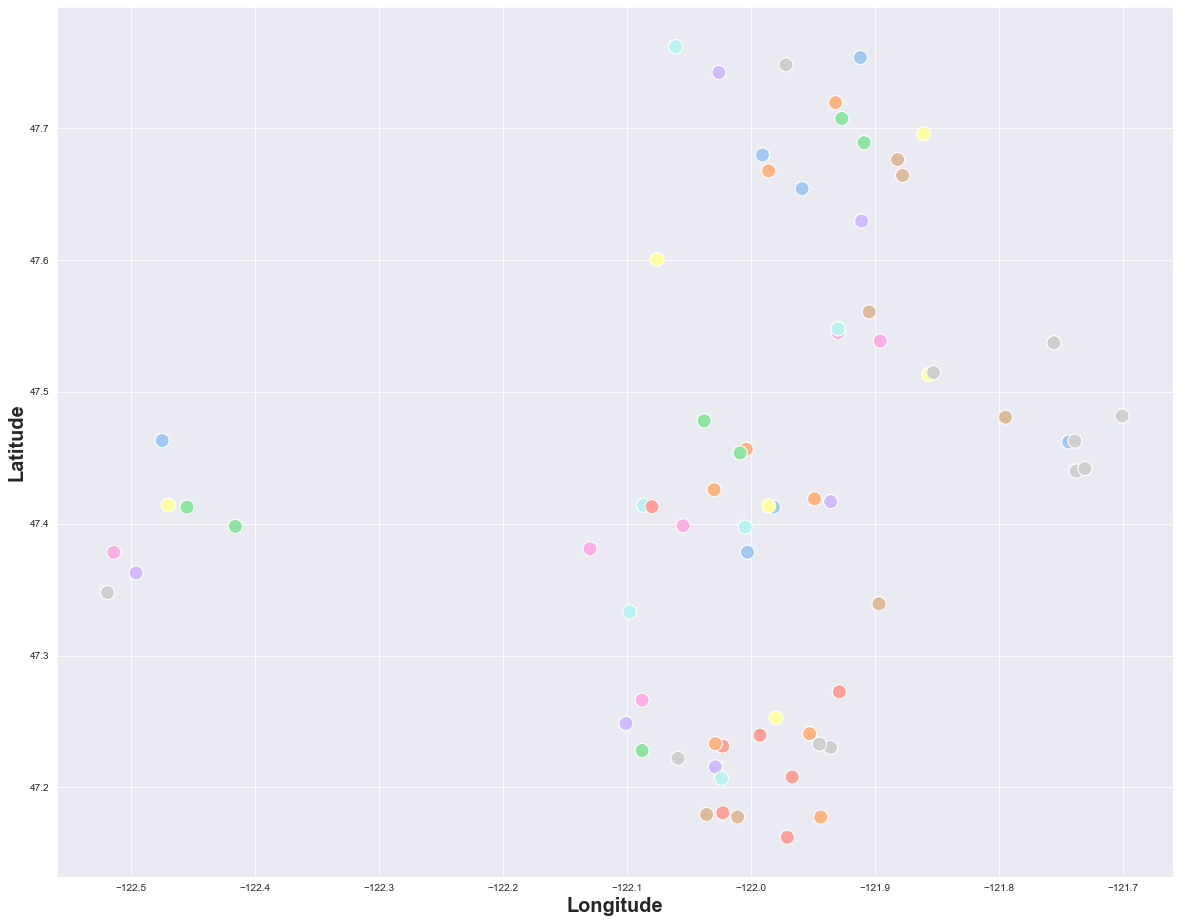

In [16]:
plt.figure(figsize=(20,16))
sns.scatterplot (x = 'long', y = 'lat', data = clean_df[clean_df.sqft_lot > 300000], palette = 'pastel', hue = 'sqft_lot', legend = False, s=200)
plt.xlabel('Longitude', fontweight ='bold', fontsize = 20)
plt.ylabel('Latitude', fontweight ='bold', fontsize = 20)

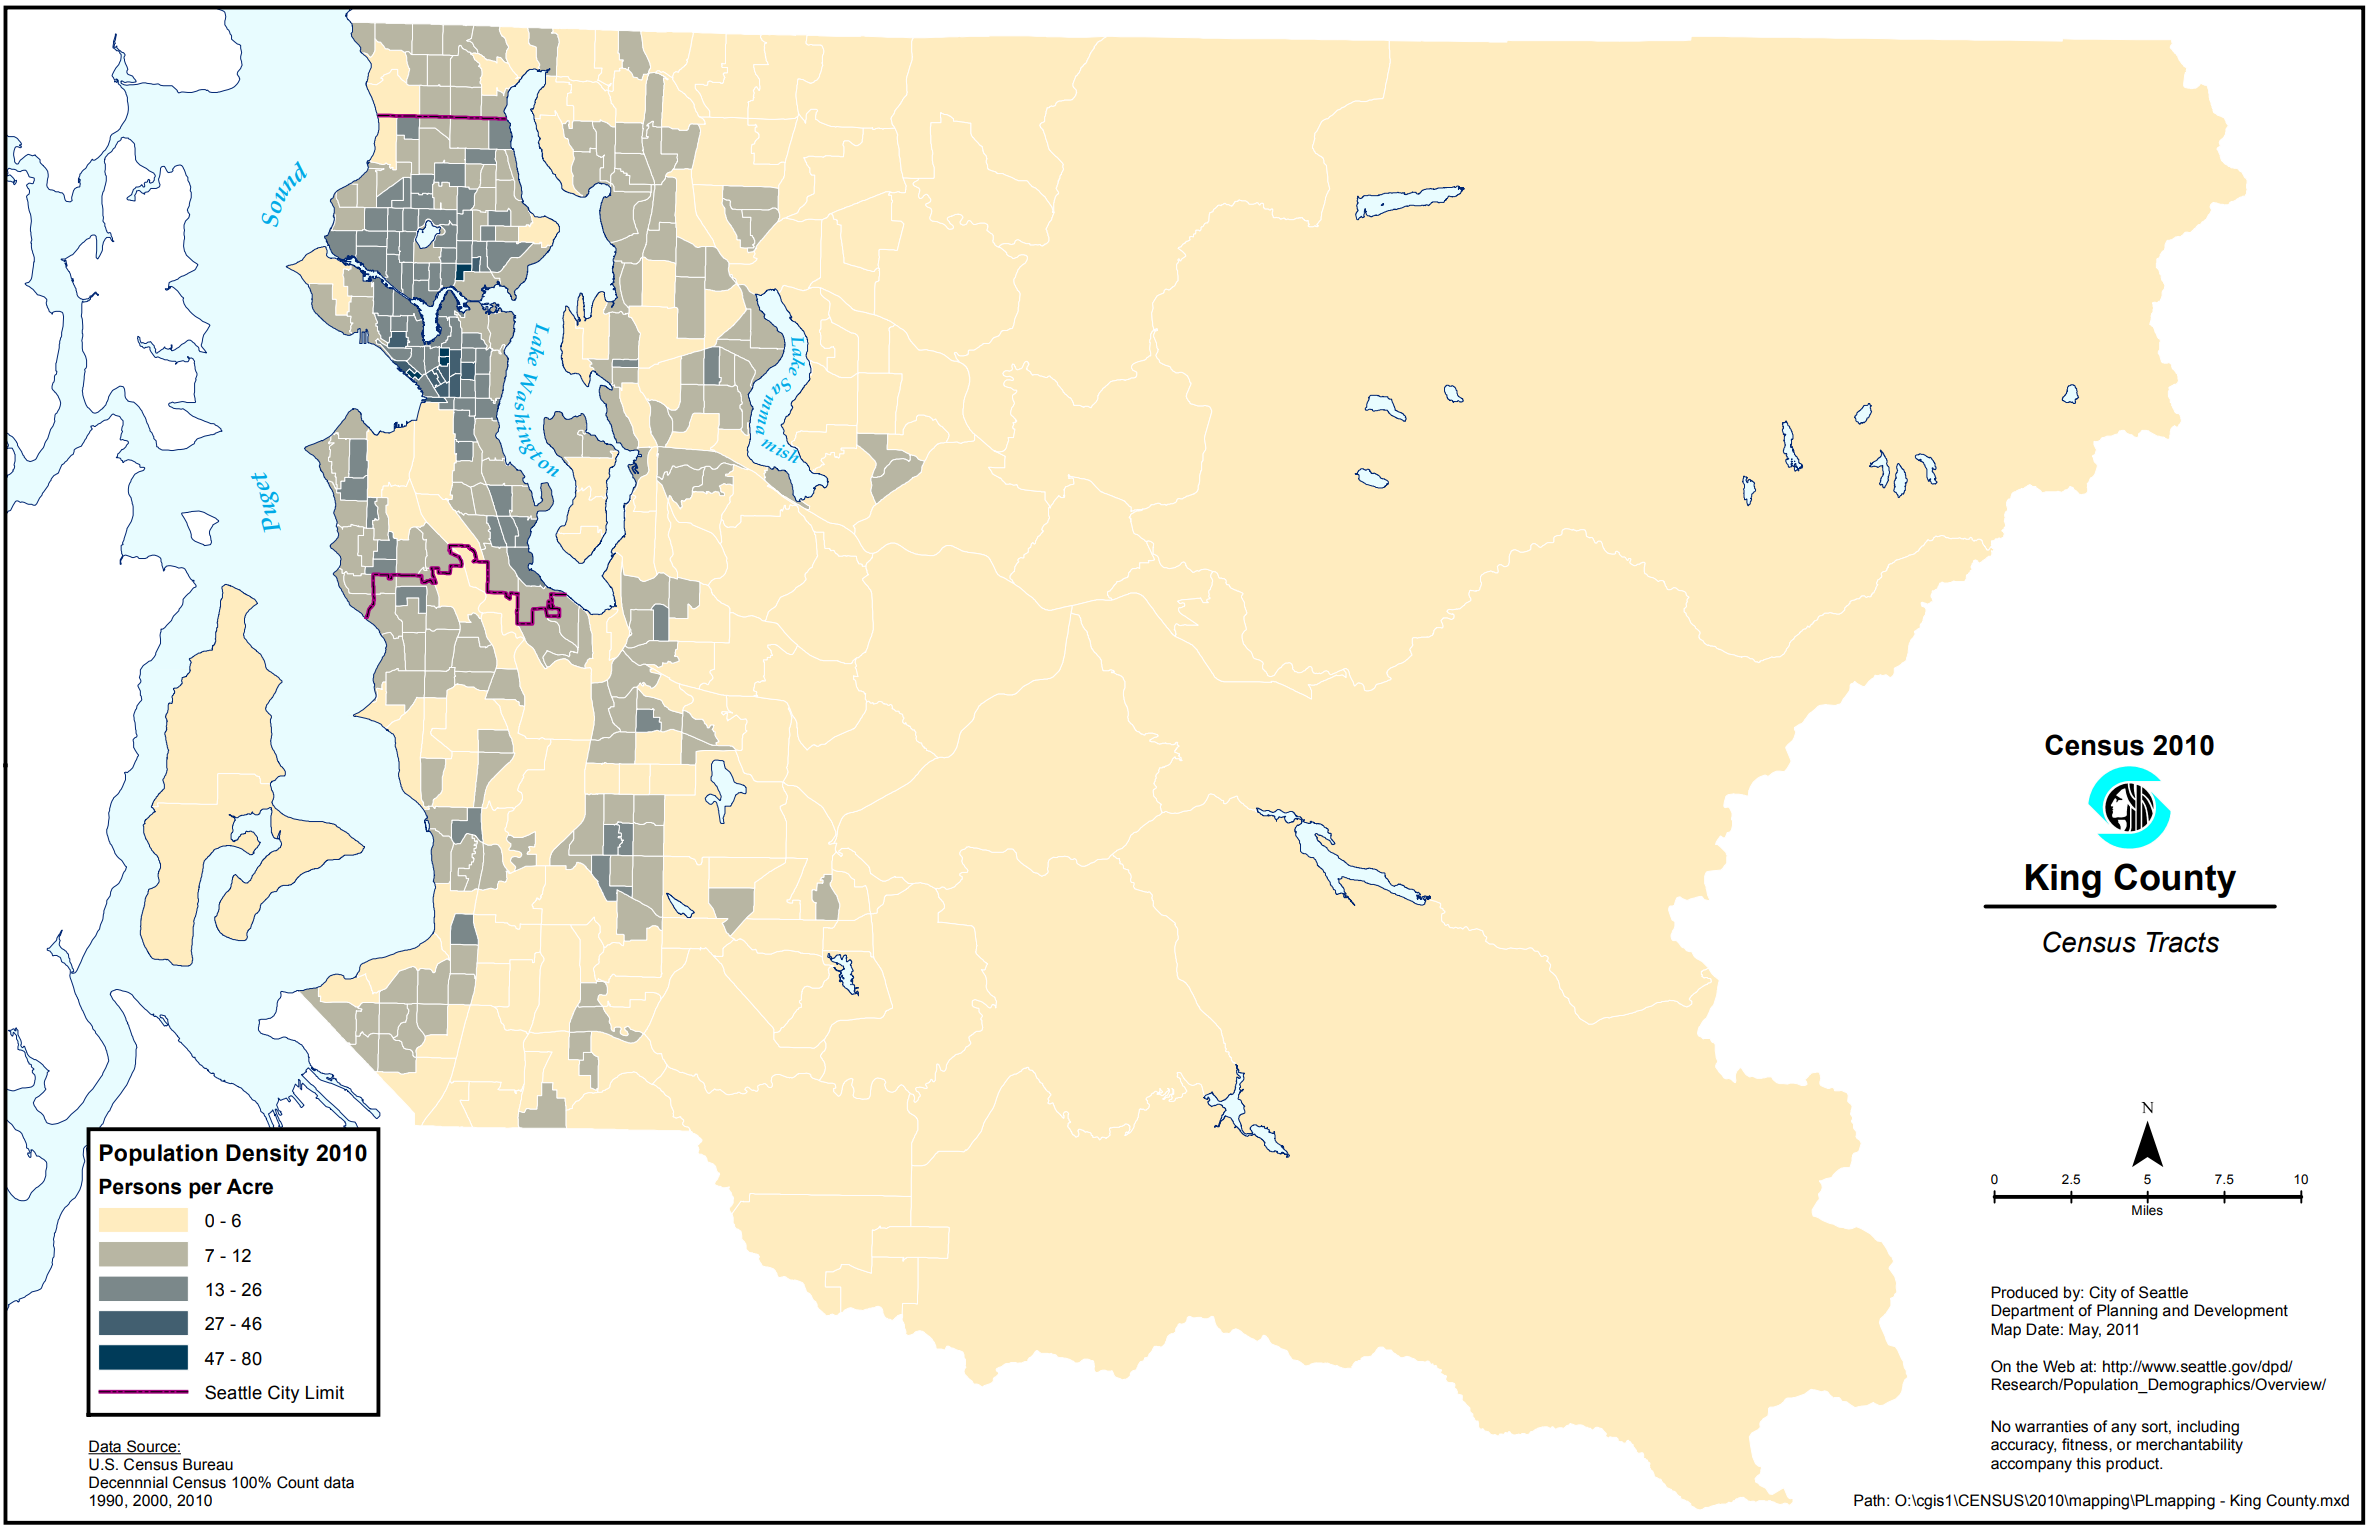

Based on a rough analysis of houses with ```sqft_lot``` values greater than 300,000, the locations of these houses were compared to the population density of King County and it was shown that the rough locations based on population density of these houses matched reasonably with the shown sizes of the house's lots. As a result, these entries are deemed valid and reasonable and will be included in the analysis.

### Floors

In [17]:
# I want to examine the floors that are not integers to check for the following:
# (1): What is the frequency of floors with '.5' end float values?
# (2): Can these data entries be discluded in my calculation if the total amount is negligable?
# (3): If not, can I round up or down to the nearest integer value?
# (4): If not, do I assume this is a standard method of notating floors and the data should be untouched?

df_1 = clean_df[clean_df.floors == 1.5]
df_2 = clean_df[clean_df.floors == 2.5]
df_3 = clean_df[clean_df.floors == 3.5]


frames_1 = [df_1, df_2, df_3]
result_1 = pd.concat(frames_1)
result_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12,114101516,5/28/2014,310000,3,1.00,1430,19901,1.5,0.0,0.0,...,7,1430,0,1927,NaN,98028,47.7558,-122.229,1780,12697
14,1175000570,3/12/2015,530000,5,2.00,1810,4850,1.5,0.0,0.0,...,7,1810,0,1900,0.0,98107,47.6700,-122.394,1360,4850
17,6865200140,5/29/2014,485000,4,1.00,1600,4300,1.5,0.0,0.0,...,7,1600,0,1916,0.0,98103,47.6648,-122.343,1610,4300
25,1202000200,11/3/2014,233000,3,2.00,1710,4697,1.5,0.0,0.0,...,6,1710,0,1941,0.0,98002,47.3048,-122.218,1030,4705
27,3303700376,12/1/2014,667000,3,1.00,1400,1581,1.5,0.0,0.0,...,8,1400,0,1909,0.0,98112,47.6221,-122.314,1860,3861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14871,8673400177,4/2/2015,525000,3,3.00,1730,1074,3.5,0.0,0.0,...,8,1730,0,2006,0.0,98107,47.6692,-122.392,1370,1185
15410,1702900664,4/16/2015,479000,2,2.50,1730,1037,3.5,0.0,0.0,...,8,1730,0,2008,0.0,98118,47.5594,-122.285,1280,1026
18462,1346300150,10/20/2014,3300000,8,4.00,7710,11750,3.5,0.0,0.0,...,12,6090,1620,1904,0.0,98112,47.6263,-122.314,4210,8325
20292,1972200426,9/18/2014,525000,2,2.75,1310,1268,3.5,0.0,0.0,...,8,1310,0,2007,0.0,98103,47.6534,-122.355,1350,1288


Given the frequency of floor's float values ending in either '.5', the data should not be discluded as it represents nearly <b>1/11</b> of the total data entries.

As a result, I will have to assume this is a normal way of representing floors data in the real estate industry and the data should not be manipulated to be rounded up or down to the nearest integer value.

### Square Foot Basement

In [18]:
# I want to examine the data values of '?' under the ```sqft_basement``` column to check if this is a
# clerical issue or if it is necessary for my analysis. This will help me decide whether I should:
# (1): Exclude the data values
# (2): Manipulate the data values
# (3): Leave the data values untouched

clean_df[clean_df.sqft_basement == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


Based on the information, it may be possible to exclude the datavalues with '?' in the ```sqft_basement``` column because they only represent <b>2%</b> of the total data.

In [19]:
clean_df2 = clean_df.loc[clean_df['sqft_basement'] != '?']
clean_df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101,2,1.00,1020,1350,2.0,0.0,0.0,...,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Year Built

In [20]:
# These data values need to be changed to a decade value instead of the specific year value.
clean_df2.loc[clean_df2['yr_built'].between(1900,1909), 'yr_built'] = 1900
clean_df2.loc[clean_df2['yr_built'].between(1910,1919), 'yr_built'] = 1910
clean_df2.loc[clean_df2['yr_built'].between(1920,1929), 'yr_built'] = 1920
clean_df2.loc[clean_df2['yr_built'].between(1930,1939), 'yr_built'] = 1930
clean_df2.loc[clean_df2['yr_built'].between(1940,1949), 'yr_built'] = 1940
clean_df2.loc[clean_df2['yr_built'].between(1950,1959), 'yr_built'] = 1950
clean_df2.loc[clean_df2['yr_built'].between(1960,1969), 'yr_built'] = 1960
clean_df2.loc[clean_df2['yr_built'].between(1970,1979), 'yr_built'] = 1970
clean_df2.loc[clean_df2['yr_built'].between(1980,1989), 'yr_built'] = 1980
clean_df2.loc[clean_df2['yr_built'].between(1990,1999), 'yr_built'] = 1990
clean_df2.loc[clean_df2['yr_built'].between(2000,2009), 'yr_built'] = 2000
clean_df2.loc[clean_df2['yr_built'].between(2010,2019), 'yr_built'] = 2010
clean_df2.loc[clean_df2['yr_built'].between(2020,2029), 'yr_built'] = 2020

In [21]:
clean_df2.yr_built.value_counts()

2000    3435
1960    2606
1950    2415
1970    2252
1980    2221
1990    2199
1940    1719
2010    1208
1920    1157
1910     786
1900     629
1930     515
Name: yr_built, dtype: int64

### Year Renovated

In [22]:
# These data values need to be examined for consistency as information is represented differently. 
# The following assumptions were made:
# (1): Float values =/ '0.0' have been renovated on the year of the float value listed.
# (2): Float values == '0.0' have not been renovated at all.
# (3): Values == 'NaN' have no information on whether the house has been renovated or not.
# An assessment must be made on whether to include 'NaN' values in my analysis. In order to achieve this:
# (1): Is the frequency of 'N/A' values significant enough to meaningful impact my analysis if they are discluded?
# (2): If the frequency is significant, is it safe to replace their values with '0.0'?

nan_values = clean_df2[clean_df2['yr_renovated'].isna()]
nan_values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1930,NaN,98028,47.7379,-122.233,2720,8062
12,114101516,5/28/2014,310000,3,1.00,1430,19901,1.5,0.0,0.0,...,7,1430,0,1920,NaN,98028,47.7558,-122.229,1780,12697
23,8091400200,5/16/2014,252700,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0,1980,NaN,98030,47.3533,-122.166,1220,8386
26,1794500383,6/26/2014,937000,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700,1910,NaN,98119,47.6386,-122.360,1760,3573
28,5101402488,6/24/2014,438000,3,1.75,1520,6380,1.0,0.0,0.0,...,7,790,730,1940,NaN,98115,47.6950,-122.304,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,4140940150,10/2/2014,572000,4,2.75,2770,3852,2.0,0.0,0.0,...,8,2770,0,2010,NaN,98178,47.5001,-122.232,1810,5641
21576,1931300412,4/16/2015,475000,3,2.25,1190,1200,3.0,0.0,0.0,...,8,1190,0,2000,NaN,98103,47.6542,-122.346,1180,1224
21577,8672200110,3/17/2015,1090000,5,3.75,4170,8142,2.0,0.0,2.0,...,10,4170,0,2000,NaN,98056,47.5354,-122.181,3030,7980
21579,1972201967,10/31/2014,520000,2,2.25,1530,981,3.0,0.0,0.0,...,8,1480,50,2000,NaN,98103,47.6533,-122.346,1530,1282


Based on the information, <b>1/5</b> of the values in ```yr_renovated``` are represented by the 'NaN' value. As a result, these values should not be discluded from my analysis, so consideration should be made to replace their values with '0.0' to represent that renovations have not been made on the property. 
Further analysis should be conducted to determine whether to manipulate the data or to treat it as its own separate category.

In [23]:
# Next, I want to convert the values of integers > 0.0 to 1, the value of 0.0 to 0, and NaN left alone.
clean_df2['has_renovated'] = clean_df2.yr_renovated.map(lambda x: 1 if x > 0 else 0)
clean_df2.has_renovated.value_counts()
# How to keep NaN values?
# maybe look at relationship between date renovated(or not) and when house was built, etc

0    20419
1      723
Name: has_renovated, dtype: int64

In [24]:
clean_df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_renovated
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0,1950,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1950,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1930,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1960,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1980,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0,2000,0.0,98103,47.6993,-122.346,1530,1509,0
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0,2010,0.0,98146,47.5107,-122.362,1830,7200,0
21594,1523300141,6/23/2014,402101,2,1.00,1020,1350,2.0,0.0,0.0,...,1020,0,2000,0.0,98144,47.5944,-122.299,1020,2007,0
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0,2000,0.0,98027,47.5345,-122.069,1410,1287,0


### Converting ```date``` from 'object' data type to 'int' data type

In [25]:
clean_df2.date.value_counts()

6/23/2014    139
6/25/2014    129
7/8/2014     126
6/26/2014    125
4/27/2015    122
            ... 
2/15/2015      1
11/2/2014      1
1/10/2015      1
1/31/2015      1
7/27/2014      1
Name: date, Length: 372, dtype: int64

In [26]:
# The ```date``` column should be simplified to simply look at the month the house was sold.
df1 = clean_df2['date'].str.split('/', n=2, expand=True)
clean_df2['Month'] = df1[0]
clean_df2.drop(columns = ['date'])
clean_df2 = clean_df2[['id', 'Month', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'has_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
clean_df2

,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,has_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1950,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1950,1,98125,47.7210,-122.319,1690,7639
2,5631500400,2,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1930,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1960,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1980,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0,2000,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0,2010,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6,402101,2,1.00,1020,1350,2.0,0.0,0.0,...,7,1020,0,2000,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1,400000,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0,2000,0,98027,47.5345,-122.069,1410,1287


Now the ```date``` column has been converted from an 'object' data type to an 'int' data type in addition to simplifying the data to be more focused on the core purpose of my analysis.

In [27]:
clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21142 non-null  int64  
 1   Month          21142 non-null  object 
 2   price          21142 non-null  int64  
 3   bedrooms       21142 non-null  int64  
 4   bathrooms      21142 non-null  float64
 5   sqft_living    21142 non-null  int64  
 6   sqft_lot       21142 non-null  int64  
 7   floors         21142 non-null  float64
 8   waterfront     18803 non-null  float64
 9   view           21081 non-null  float64
 10  condition      21142 non-null  int64  
 11  grade          21142 non-null  int64  
 12  sqft_above     21142 non-null  int64  
 13  sqft_basement  21142 non-null  object 
 14  yr_built       21142 non-null  int64  
 15  has_renovated  21142 non-null  int64  
 16  zipcode        21142 non-null  int64  
 17  lat            21142 non-null  float64
 18  long  

In [28]:
clean_df2.to_csv('cleaned_data.csv')

In [29]:
pwd

'C:\\Users\\User\\Documents\\Flatiron\\Phase2'